# Exercicio Pratico DBSCAN

## Importando os pacotes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

## Dataset

In [3]:
#
x, y = make_blobs(n_samples=2000, centers=3, n_features=5, cluster_std=1.5, random_state=5)

In [4]:
# Quando rodo o código vejo que tem um array com 5 colunas
x

array([[-10.39787625,   4.36079235,  -1.58402095,  -6.6737369 ,
          7.7514827 ],
       [ -6.64404147,   7.55455792, -10.38317469,   9.37433313,
          0.7431833 ],
       [  2.55889922,   5.00715385,   3.66389838,  -4.20576568,
         -4.09274141],
       ...,
       [ -8.34984108,   2.63785583,  -0.13248849,  -6.46609463,
          8.20615491],
       [ -7.62712919,   3.19539201,  -1.25393536,  -6.58962974,
          3.70144051],
       [ -7.24898463,   6.45974306,  -4.35240627,   7.02841875,
          1.60388112]])

In [5]:
len(x)

2000

In [6]:
y

array([2, 0, 1, ..., 2, 2, 0])

In [7]:
# Para não ver como array e sim como dataframe transformo em dataframe.
dataframe = pd.DataFrame(x)

In [8]:
# Ploto os 5 primeiros casos
# 
dataframe.head(5)

,0,1,2,3,4
0,-10.397876,4.360792,-1.584021,-6.673737,7.751483
1,-6.644041,7.554558,-10.383175,9.374333,0.743183
2,2.558899,5.007154,3.663898,-4.205766,-4.092741
3,-9.348389,4.350812,-2.944685,-5.706560,8.898080
4,3.396861,8.781691,0.738109,-4.137496,-5.617840


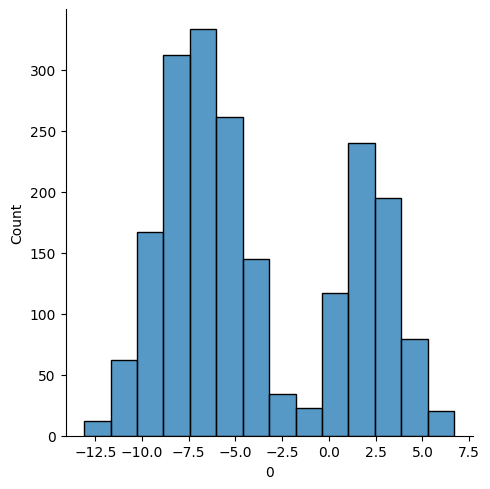

In [9]:
sns.displot(dataframe[0])

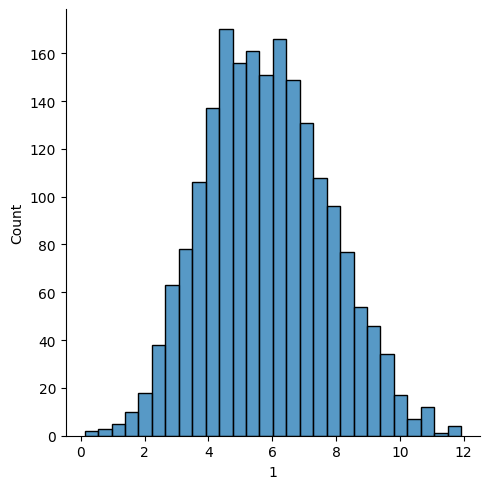

In [10]:
sns.displot(dataframe[1])

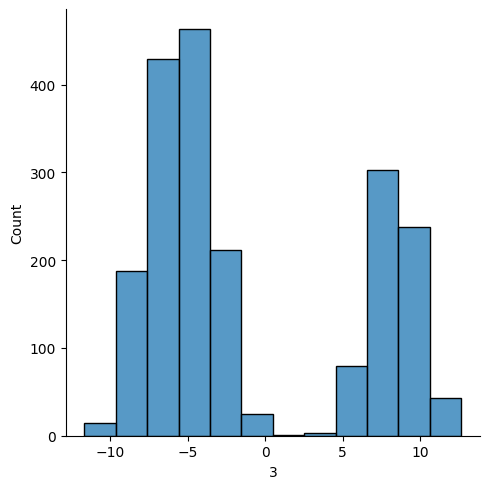

In [11]:
sns.displot(dataframe[3])

## Análise

In [12]:
dataframe.describe()

,0,1,2,3,4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-3.857046,5.829193,-2.201980,-0.871077,0.412144
std,4.745863,1.919938,3.047048,6.745294,5.893915
min,-13.092271,0.122948,-10.950661,-11.670290,-10.491923
25%,-7.671271,4.425564,-4.862067,-6.161922,-5.159695
50%,-5.508009,5.747292,-1.581263,-4.045759,-0.194352
75%,1.274527,7.126622,0.169520,7.215933,6.624610
max,6.692052,11.923744,6.351768,12.665066,12.731801


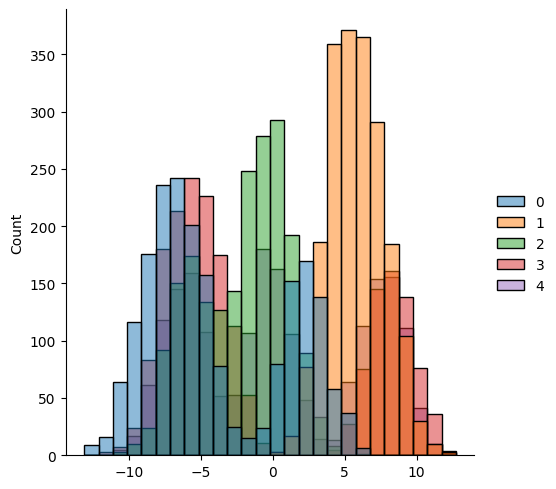

In [13]:
sns.displot(dataframe)

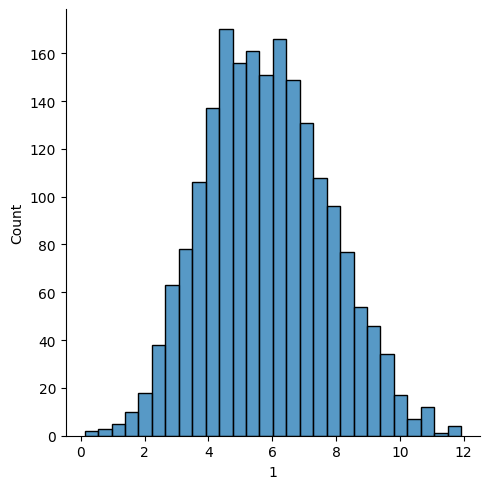

In [14]:
sns.displot(dataframe[1])

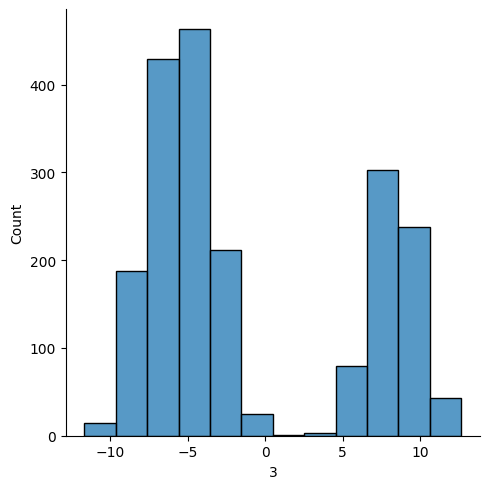

In [15]:
sns.displot(dataframe[3])

In [16]:
db = DBSCAN()
retorno = db.fit_predict(x)

In [17]:
db.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [18]:
# Nesse caso todos os pontos são outliers o que é estranho e sabemos que é outlier por conta do -1
# Com um EPS pequeno acaba ocorrendo isso pois não consegue satisfazer as opções que precisa para identificar corepoins (minimo de pontos dentro de uma distancia EPS)
pd.Series(retorno).value_counts()

-1    2000
dtype: int64

### Utilizando o modelo


*   MinPt: Como temos 5 dimensões utilizaremos o MinPts = 2 * 5 = 10
*   EPS: Vamos achar o EPS calculando a distância média entre cada ponto no conjunto de dados e seus 10 vizinhos mais próximos (meu valor MinPts selecionado).



In [19]:
#Calcule a distância média entre cada ponto no conjunto de dados e seus 10 vizinhos mais próximos (meu valor MinPts selecionado).
plt.figure(figsize=(10,7))
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(dataframe)

<Figure size 1000x700 with 0 Axes>

In [20]:
distances, indices = neighbors_fit.kneighbors(dataframe)

In [21]:
len(distances)

2000

In [22]:
distances[:,1]

array([0.66007227, 2.3126266 , 1.5436392 , ..., 0.90588074, 1.73523818,
       1.05269293])

In [23]:
distances = np.sort(distances, axis=0)

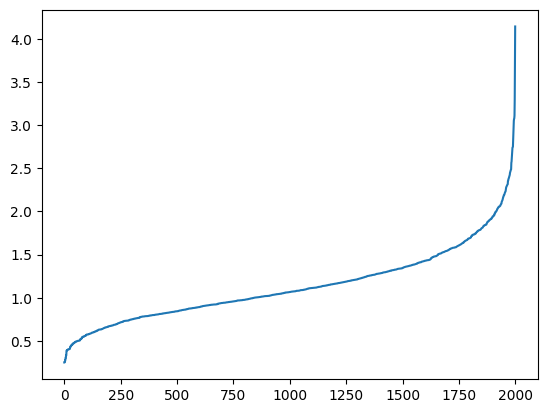

In [24]:
plt.plot(distances[:,1])
plt.show()

0


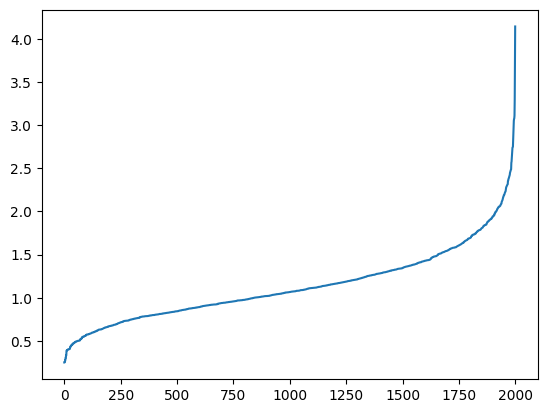

1


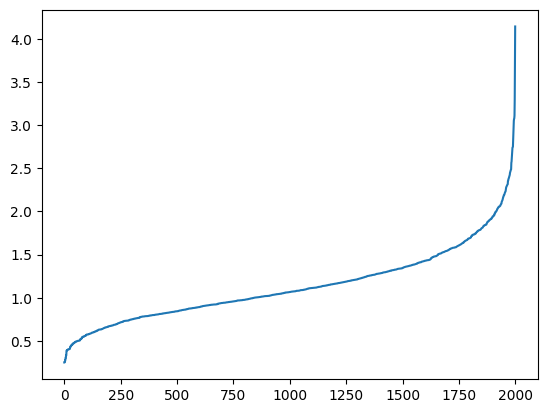

2


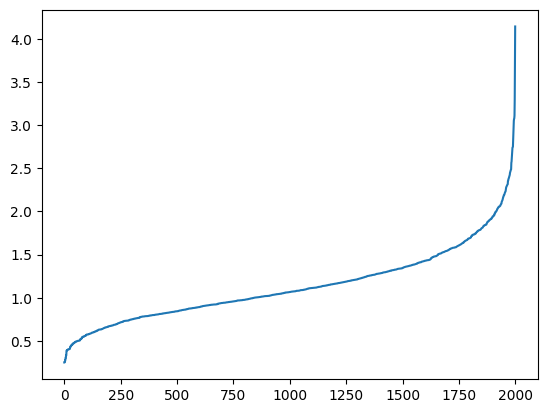

3


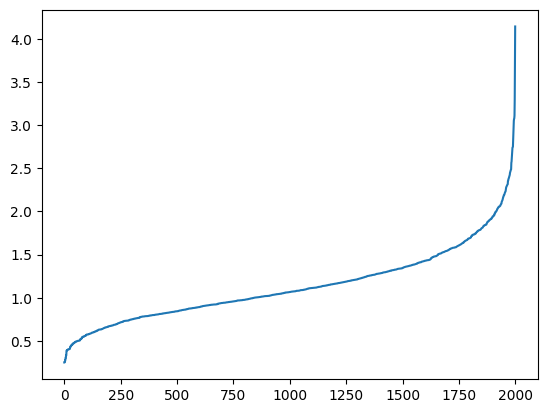

4


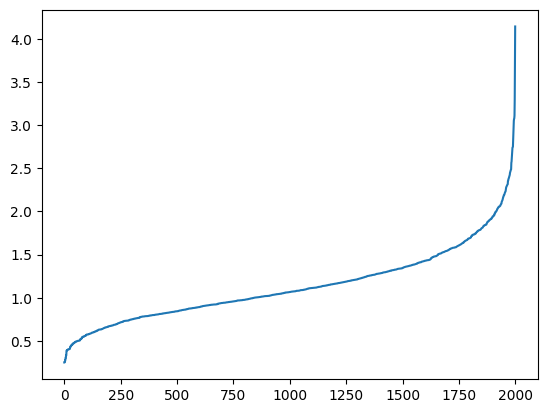

5


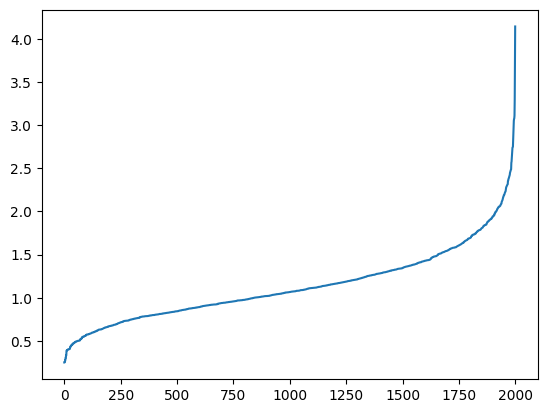

6


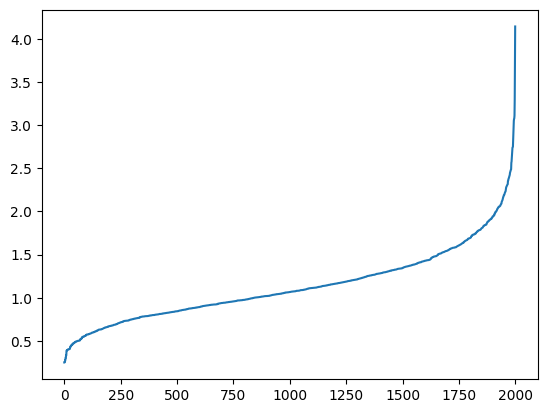

7


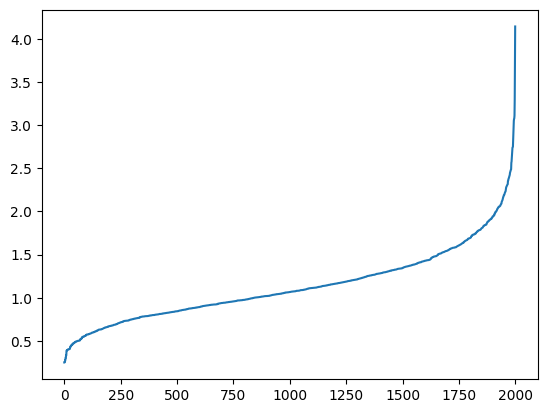

8


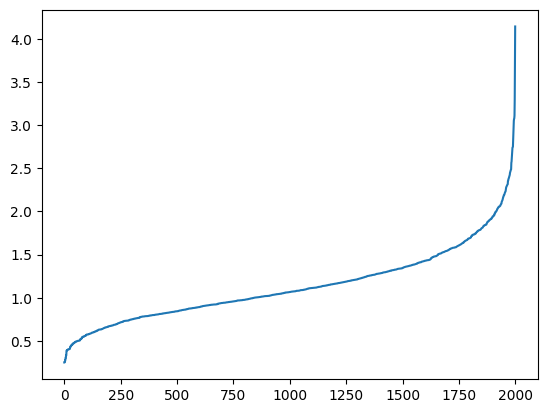

9


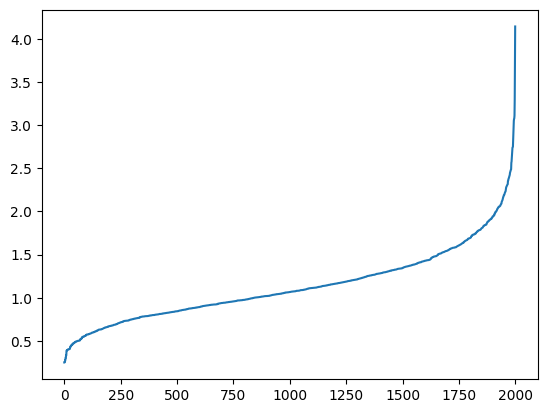

In [25]:
for i in range(10):
  print(i)
  plt.plot(distances[:,1])
  plt.show()

In [26]:
model = DBSCAN(eps=2, min_samples=10)
yhat = model.fit_predict(x)
clusters = np.unique(yhat)

In [27]:
dataframe['dbscan_cluster'] = yhat

In [28]:
dataframe['dbscan_cluster'].value_counts()

 2    600
 1    597
 0    589
-1    214
Name: dbscan_cluster, dtype: int64

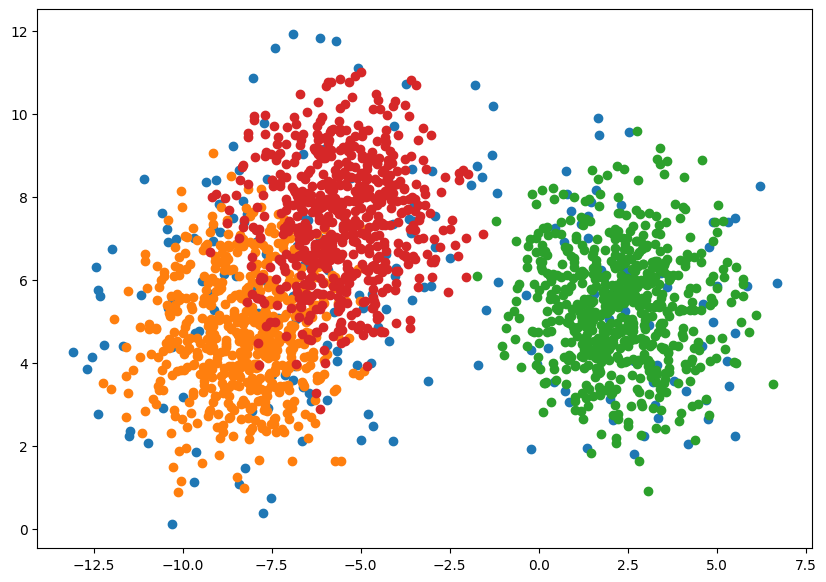

In [29]:
fig= plt.figure(figsize=(10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
plt.show()

### Comparação kmeans

In [30]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(3)

In [32]:
dataframe.columns

Index([0, 1, 2, 3, 4, 'dbscan_cluster'], dtype='object')

In [33]:
dataframe['kmeans_clusters'] = km.fit_predict(dataframe[[0,1,2,3,4]])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
dataframe

,0,1,2,3,4,dbscan_cluster,kmeans_clusters
0,-10.397876,4.360792,-1.584021,-6.673737,7.751483,0,0
1,-6.644041,7.554558,-10.383175,9.374333,0.743183,-1,2
2,2.558899,5.007154,3.663898,-4.205766,-4.092741,1,1
3,-9.348389,4.350812,-2.944685,-5.706560,8.898080,0,0
4,3.396861,8.781691,0.738109,-4.137496,-5.617840,1,1
...,...,...,...,...,...,...,...
1995,-7.733664,4.860262,-0.253524,-7.574888,7.813723,0,0
1996,-8.941344,6.422689,0.116346,-4.986655,6.009653,0,0
1997,-8.349841,2.637856,-0.132488,-6.466095,8.206155,0,0
1998,-7.627129,3.195392,-1.253935,-6.589630,3.701441,0,0


<Axes: xlabel='0', ylabel='1'>

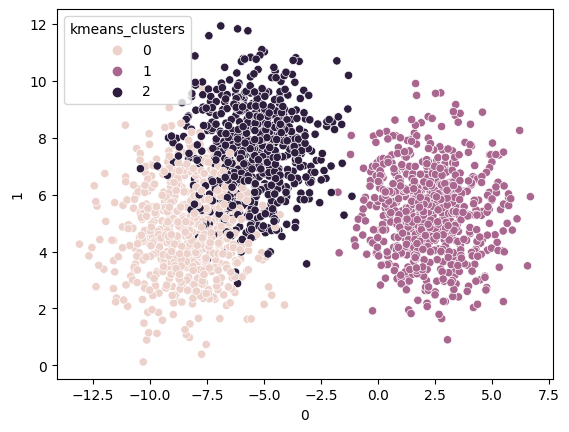

In [35]:
sns.scatterplot(x = 0 ,y = 1, hue= 'kmeans_clusters', data = dataframe)

In [36]:
dataframe.groupby('dbscan_cluster')['kmeans_clusters'].value_counts()

dbscan_cluster  kmeans_clusters
-1              0                   77
                1                   70
                2                   67
 0              0                  589
 1              1                  597
 2              2                  600
Name: kmeans_clusters, dtype: int64